In [6]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

### Importar a Base de Dados

In [7]:
df = pd.read_csv('dataset_malwares.csv')

X_all=df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'],axis=1) # Drop: Descatar colunas, buscando usar apenas 35 atributos
#X.info()
y_all=df['Malware'] # Atributo alvo

print("Total amostras: ", y_all.shape) 
print("Qtde Malware Malignos: ", np.count_nonzero(y_all, axis=0))
print("Qtde Malware Benignos: ",y_all.shape - np.count_nonzero(y_all, axis=0))

Total amostras:  (19611,)
Qtde Malware Malignos:  14599
Qtde Malware Benignos:  [5012]


In [18]:
X = X_all
y = y_all
X, X_val, y, y_val = train_test_split(X, y, train_size=0.8, random_state=46, stratify=y)

def choose(fchoice):
    
    if fchoice == 1: # KNN
        fclf = KNeighborsClassifier()
        fparams = [{'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights':['uniform', 'distance']}]
    elif fchoice == 2: # NaiveBayes
        fclf = GaussianNB()
        fparams = [{'var_smoothing':[1e-09,1e-03, 1e-06]}] 
    elif fchoice == 3: # Decision Tree
        fclf = DecisionTreeClassifier()
        fparams = [{'criterion':['gini', 'entropy', 'log_loss'], 
                    'max_depth': [None, 5, 10], 
                    'min_samples_split':[2, 5], 
                    'splitter':['random', 'best']}] 
    else: # MLP
        fclf = MLPClassifier()
        fparams = [{'hidden_layer_sizes':[16, (16, 8), (16, 8, 4)], 
                    'learning_rate': ['constant', 'invscaling'], 
                    'learning_rate_init':[0.01, 0.001, 0.0001], 
                    'activation':['relu', 'logistic', 'tanh'], 
                    'random_state':[10, 46, 37]}]
        
    return fclf, fparams

        

clf, params = choose(1)

gs = GridSearchCV(clf, params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_val, y_val)

print("Os melhores parâmetros foram: {} ".format(gs.best_params_))

clf = gs.best_estimator_

Os melhores parâmetros foram: {'n_neighbors': 7, 'weights': 'distance'} 


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.95845086        nan 0.96329423        nan 0.96380443
        nan 0.96482484        nan 0.96354933        nan 0.96354868]
  warnings.warn(


### Métricas

Acurácia média foi de: 0.97
Precisão foi de 0.96
Revocação foi de 0.96
F1: 0.96


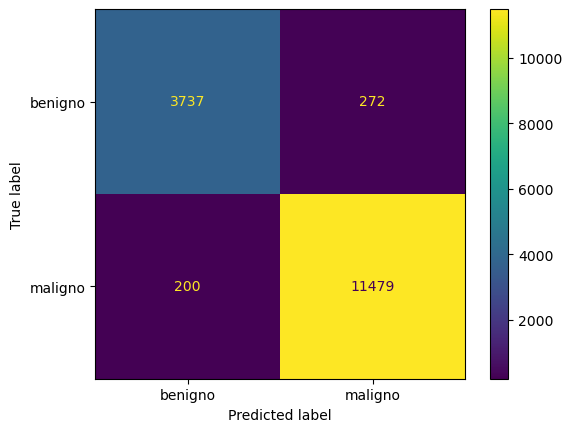

In [19]:
acuracia_media = model_selection.cross_val_score(clf, X, y, cv=5)
print("Acurácia média foi de: {:.2f}".format(acuracia_media.mean())) 

y_pred = model_selection.cross_val_predict(clf, X, y, cv=5)

#Precisão
precisao = precision_score(y, y_pred, average='macro')

#Revocação
revocacao = recall_score(y, y_pred, average='macro')

#F1-score
f1 = f1_score(y, y_pred, average='macro')

print("Precisão foi de {:.2f}".format(precisao))
print("Revocação foi de {:.2f}".format(revocacao))
print("F1: {:.2f}".format(f1))

cm = confusion_matrix(y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benigno', 'maligno'])
disp.plot()